## DATA GENERATION

From the previous notebook, "Data_exploration.ipynb", we've retrieved files of patients with COVID-19. Since our goal is to make a network who's able to classify whether or not someone has COVID-19, we're lacking files of healthy patients.
Our next goal is to look for a database with healthy patients.

The Kaggle's Chest X-Ray Images (Pneumonia) Dataset, https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia, contains three differrent folders : Viral Pneumonia, Bacterial Pneumonia, and Normal.

We'll take the files from the "Normal" to build a [COVID19 - Normal] classification network.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread_collection

In [2]:
#Checking the number of covid19 images
_,_,covid19_files = next(os.walk("covid19_ap"))

#Checking the number of normal images
_,_,normal_files = next(os.walk("NORMAL"))

print('There are {} "COVID-19" files and {} "Normal" (healthy patients) files!'.format(len(covid19_files), len(normal_files)))

There are 146 "COVID-19" files and 1311 "Normal" (healthy patients) files!


As shown  above, the number of "Normal" files clearly exceed the number of "COVID-19" files. In order to avoid an unbalanced dataset, we'll keep in mind to retrieve approximatively the same number of images.

In [3]:
X, Y = [], []
shape = (224,224)
covid_folder = "covid19_ap"
normal_folder = "NORMAL"

##### Covid19

In [4]:
#collection d'images covid
covid = imread_collection(covid_folder +'/*')

In [5]:
for i in range(len(covid)):
        img = cv2.cvtColor(covid[i], cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,shape)
        X.append(img)
        Y.append("COVID-19")

##### Normal

In [6]:
normal = imread_collection(normal_folder +'/*')

In [7]:
j = 0
for i in range(len(normal)):
    while j <= 146:
        img = cv2.cvtColor(normal[i], cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,shape)
        X.append(img)
        Y.append("Normal")
        j+=1

## Image Preprocessing

### 1.  Histogram Matching

Since our images come from differentes sources (scanner), we'll take one image as reference to standardize our dataset

In [8]:
from skimage.exposure import match_histograms

Text(0.5, 1.0, 'Reference image')

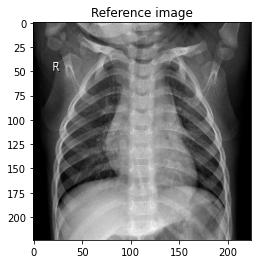

In [9]:
Ref = X[155]
plt.imshow(Ref)
plt.title('Reference image')

In [10]:
for i in range(len(X)):
    if i != 155: #on ne matche pas l'image de référence
        X[i] = match_histograms(X[i], Ref, multichannel=True)

Text(0.5, 0.98, 'Matched Images')

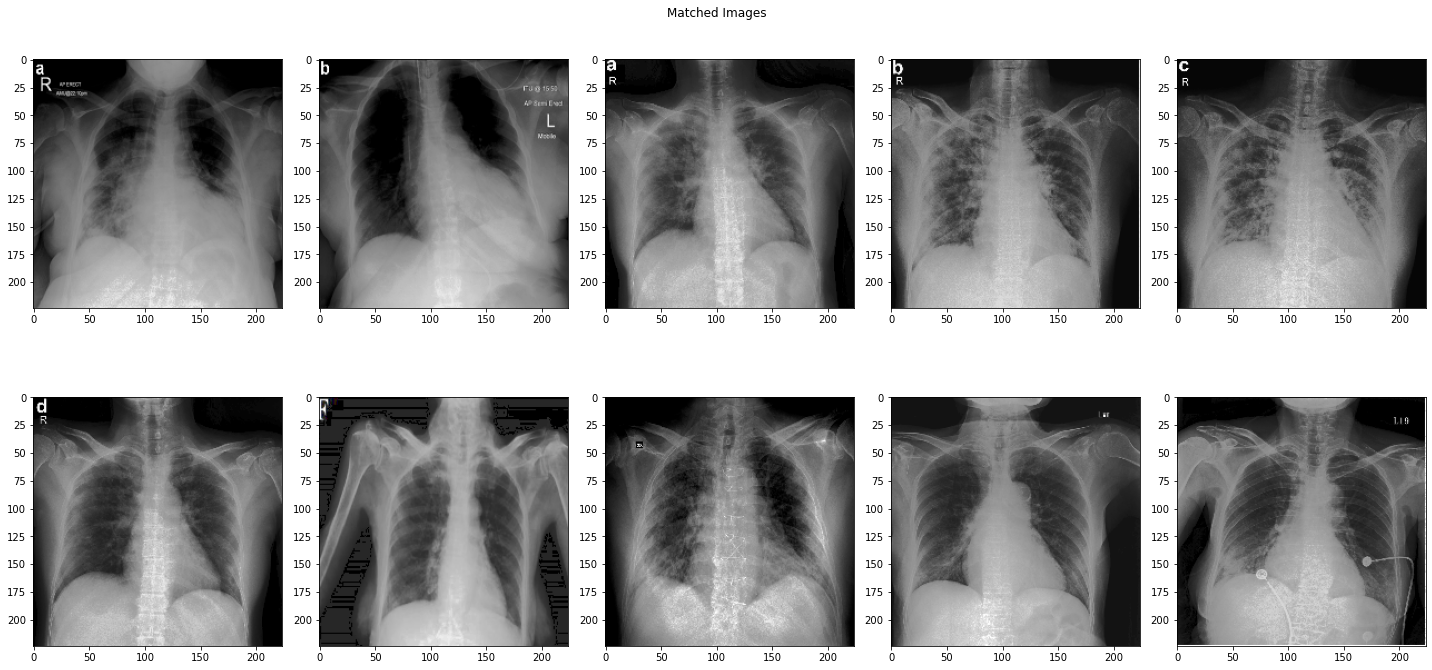

In [11]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])
plt.tight_layout()
plt.suptitle('Matched Images')

### 2. Histogramm Equalization (CLAHE)

In this part we'll now adjust the images intensities to enhance contrast

In [12]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

In [13]:
for i in range(len(X)):
    X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
    X[i] = clahe.apply(X[i])

Back to RGB

In [14]:
for i in range(len(X)):
    X[i]= cv2.cvtColor(X[i],cv2.COLOR_GRAY2RGB)

Text(0.5, 0.98, 'CLAHE Images')

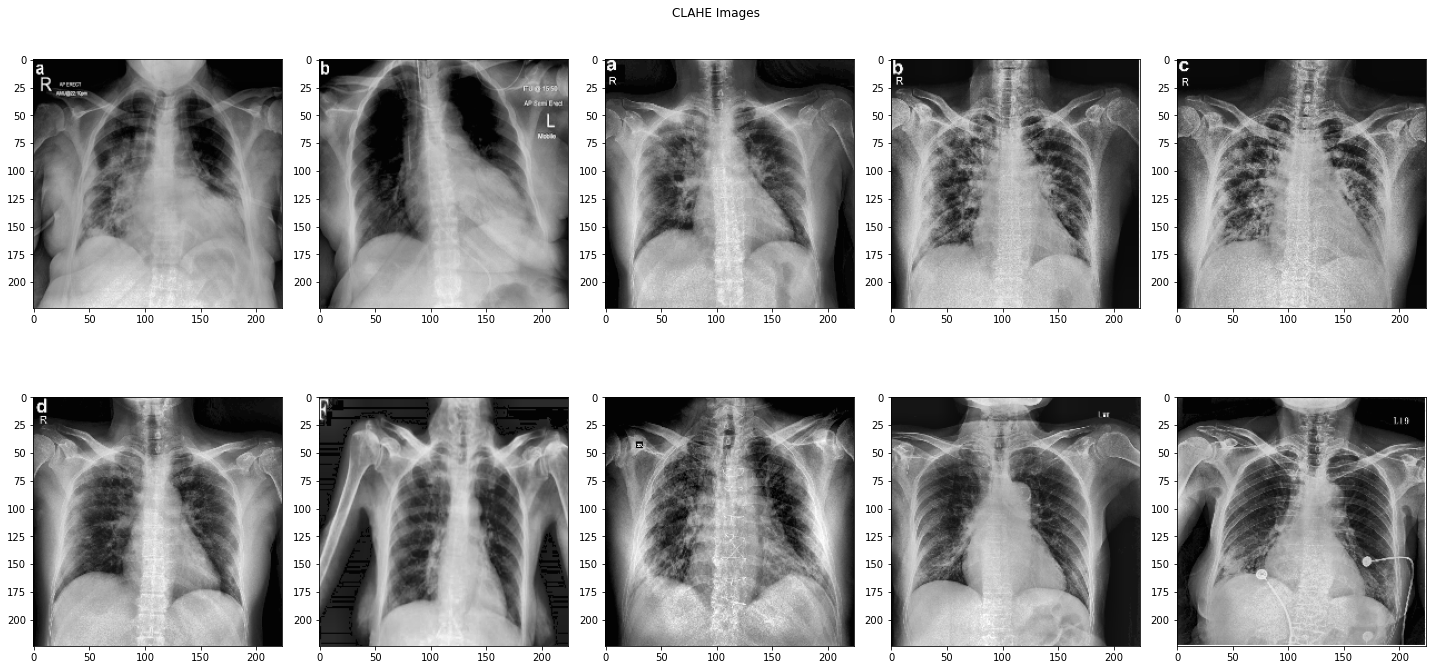

In [15]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i])
plt.tight_layout()
plt.suptitle('CLAHE Images')

Perform one hot encoding

In [16]:
from sklearn.preprocessing import LabelBinarizer

In [17]:
X = np.asarray(X)
Y = np.asarray(Y)

#[0-255] --> [0-1] 
X = X/ 255.0

In [18]:
lb = LabelBinarizer()
Y  = lb.fit_transform(Y)

### Save

In [19]:
np.save("Y.npy",Y)
np.save("X.npy",X)